In [127]:
%load_ext autoreload
%autoreload 2
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [128]:

from IPython.core.display import HTML
HTML('<style>.container { width:97% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

In [129]:
from keras.datasets import mnist
import utilities
import numpy as np
import embedder_generator as emb_gen
import keras.backend as K
from my_callbacks import MyCallback_sinusoidal
import embedder as e
from sklearn.preprocessing import Normalizer

from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.initializers import RandomNormal
import umap


from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime
from keras.callbacks import TensorBoard

In [130]:
X,y,_,_ = load_MINST(500,1000)
input_auto = len(X[0])

In [146]:
uma = umap.UMAP(n_components=2)
m1 = e.Transformer(uma)
emb = e.Embedder([m1],"UMAP")

In [143]:
emb_1 = gen_sAuto_UMAPdnn(input_auto = len(X[0]),
                        sauto_emb_size = 32,
                        sauto_epochs = 500,
                        sauto_plateau = 10,
                        sauto_k = 1,
                        sauto_n_period = 4,
                        sauto_scale_c = 0.001,
                        sauto_scale_d = 0.1,
                        sauto_batch_size = 32,
                        sauto_validation_split = 0.2,
                        emb_n_components = 2,
                        dnn_epochs = 100,
                        dnn_batch_size = 32,
                        folder="eliminami/")

In [135]:
emb_2 = gen_sAutoEmb(input_auto = len(X[0]),
                        sauto_emb_size = 32,
                        sauto_epochs = 500,
                        sauto_plateau = 10,
                        sauto_k = 1,
                        sauto_n_period = 4,
                        sauto_scale_c = 0.001,
                        sauto_scale_d = 0.1,
                        sauto_batch_size = 32,
                        sauto_validation_split = 0.2,
                        emb_n_components = 2,
                        folder="eliminami/")

eelse


In [147]:
vis = utilities.repeat_n_times(X,y,[emb],[2],1,seed=10,test_size=0.3)

	 iteration n: 1
	 	 dim:  2
	 	 	  UMAP


          2    STD    mean
----  -----  -----  ------
UMAP  0.702  0.066   0.384


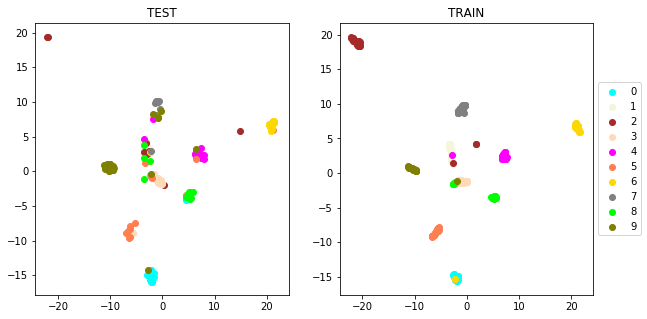

DIM: 2              TEST    TRAIN
----------------  ------  -------
K.N.N.  accuracy   0.702     0.97


In [148]:
vis.summary()
plot_eval(emb,X,y)

                                           2    STD    mean
-------------------------------------  -----  -----  ------
SupAutoencoder(500)-32 UMAPdnn(100)-2  0.665  0.094    0.38


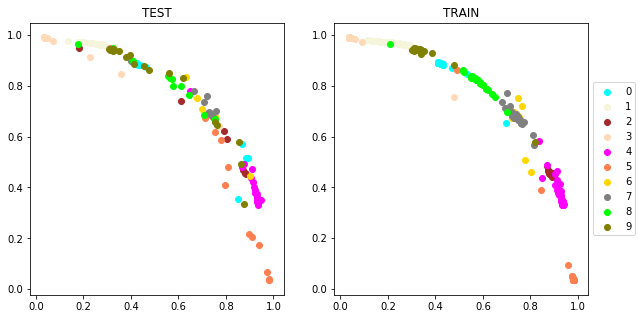

DIM: 2              TEST    TRAIN
----------------  ------  -------
K.N.N.  accuracy   0.665    0.883


In [145]:
vis_1.summary()
plot_eval(emb_1,X,y)

          2    STD    mean
----  -----  -----  ------
test  0.854  0.078   0.466


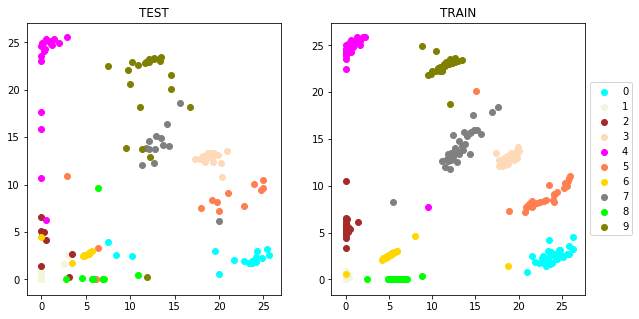

DIM: 2              TEST    TRAIN
----------------  ------  -------
K.N.N.  accuracy   0.854    0.975


In [137]:
vis_2.summary()
plot_eval(emb_2,X,y)

In [91]:
def plot_eval(emb,X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)
    res_test = emb.transform(X_test)
    res_train = emb.transform(X_train)
    plot_embedding(res_test,y_test,res_train, y_train)
    utilities.evaluate_emb_train_test(res_test,y_test,res_train,y_train)

In [142]:
def gen_sAutoEmb(input_auto,sauto_emb_size,sauto_epochs,sauto_plateau,sauto_k,sauto_n_period,sauto_scale_c,sauto_scale_d,
                      sauto_batch_size,sauto_validation_split,emb_n_components,folder):

    auto, enc = emb_gen.gen_sup_auto_callback_emb(w_dec,w_cla,input_auto,sauto_emb_size,emb_n_components,10)
    # CALLBACK  
    my_call_sin = MyCallback_sinusoidal(w_dec, w_cla, sauto_epochs,sauto_plateau,sauto_k,sauto_n_period,sauto_scale_c,sauto_scale_d)

    # SCALER
    scaler = e.Preprocessing_scaler([0, 1])    
    # NORMALIZER
    normalizer = Normalizer(copy=True, norm='l2')

    
    if (folder == None):
        tb2 = [my_call_sin]
    else:
        now = datetime.now()
        current_time = now.strftime("%H_%M_%S")
        path = str(folder)+"/auto_"+current_time
        tb2 = [TensorBoard(log_dir=path),my_call_sin]
    
    
    m1 = e.Transformer_sup_autoencoder(auto,enc,
                                             batch_size=sauto_batch_size,
                                             validation_split=sauto_validation_split,
                                             epochs=sauto_epochs,
                                             callbacks=tb2,
                                             verbose=0,
                                             normal=normalizer,
                                             scaler=scaler)
    m1 = e.Transformer(m1)

    res = e.Embedder([m1],"test")
    
    return(res)

def gen_sAuto_UMAPdnn(input_auto,sauto_emb_size,sauto_epochs,sauto_plateau,sauto_k,sauto_n_period,sauto_scale_c,sauto_scale_d,
                      sauto_batch_size,sauto_validation_split,emb_n_components,dnn_epochs,dnn_batch_size, folder):

    w_dec = K.variable(1)
    w_cla = K.variable(1)

    auto,enc = emb_gen.gen_sup_auto_callback(w_dec,w_cla,input_auto,sauto_emb_size,n_classes=10)
    # CALLBACK  
    my_call_sin = MyCallback_sinusoidal(w_dec, w_cla, sauto_epochs,sauto_plateau,sauto_k,sauto_n_period,sauto_scale_c,sauto_scale_d)

    # SCALER
    scaler = e.Preprocessing_scaler([0, 1])    
    # NORMALIZER
    normalizer = Normalizer(copy=True, norm='l2')
    
    if (folder == None):
        tb2 = [my_call_sin]
    else:
        now = datetime.now()
        current_time = now.strftime("%H_%M_%S")
        path = str(folder)+"/auto_"+current_time
        tb2 = [TensorBoard(log_dir=path),my_call_sin]
    

    m1 = e.Transformer_sup_autoencoder(auto,enc,
                                             batch_size=sauto_batch_size,
                                             validation_split=sauto_validation_split,
                                             epochs=sauto_epochs,
                                             callbacks=tb2,
                                             verbose=0,
                                             normal=normalizer,
                                             scaler=scaler)
    m1 = e.Transformer(m1)


    ##### from medium to low
    x_in = Input(shape=(sauto_emb_size,))
    den = Dense(int(sauto_emb_size/2),activation="relu")(x_in)
    den = Dense(int(sauto_emb_size/4),activation="relu")(den)
    den = Dense(emb_n_components,activation="sigmoid")(den)

    dnn = Model(x_in,den)
    dnn.compile(optimizer="adam",loss="MSE")

    uma = umap.UMAP(n_components=emb_n_components)

    dnn_umap = e.Transformer_DNN_umap(dnn,uma,
                                            epochs=dnn_epochs,
                                            batch_size=dnn_batch_size)

    m2 = e.Transformer(dnn_umap)

    emb = e.Embedder([m1,m2],"SupAutoencoder("+str(sauto_epochs)+")-"+str(sauto_emb_size)+" UMAPdnn("+str(dnn_epochs)+")-"+str(emb_n_components))
    
    return(emb)


def load_MINST(train,test):
    
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    

    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.
    x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
    x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
    x_train = x_train[0:train]
    y_train = y_train[0:train]

    x_test = x_test[0:test]
    y_test = y_test[0:test]
    
    return(x_train,y_train,x_test,y_test)



def plot_embedding(res_uma_test,y_test,res_uma_train, y_train):
    
    color_names = ["aqua", "beige", "brown", "peachpuff", "fuchsia","coral","gold","gray","lime","olive"]
    f = plt.figure(figsize=(10,5))


    tmp_y = y_test
    group = [ [] for x in range(10)]
    for i in range(len(tmp_y)):
        group[tmp_y[i]].append(res_uma_test[i])

    plt.subplot(121)
    plt.title("TEST")
    for i in range(len(group)):
        xx = group[i]
        xx = np.array(xx)
        xx = xx[:,0]
        yy = group[i]
        yy = np.array(yy)
        yy = yy[:,1]

        plt.scatter(xx,yy, c=color_names[i], label=str(i))

    tmp_y = y_train
    group = [ [] for x in range(10)]
    for i in range(len(tmp_y)):
        group[tmp_y[i]].append(res_uma_train[i])


    plt.subplot(122)
    plt.title("TRAIN")
    for i in range(len(group)):
        xx = group[i]
        xx = np.array(xx)
        xx = xx[:,0]
        yy = group[i]
        yy = np.array(yy)
        yy = yy[:,1]

        plt.scatter(xx,yy, c=color_names[i], label=str(i))

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

## Load data

### model 1 

In [14]:
autoencoder,encoder = generate_deep_autoencoder()
er = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                validation_split=0.2,
                verbose=False,
                callbacks=[er])

print(autoencoder.evaluate(x_test,x_test))
print("stopped epoch: "+ str(er.stopped_epoch))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
1000/1000 [==============================] - 0s 76us/step
0.26713405799865725
stopped epoch: 47


In [15]:
emb_train = encoder.predict(x_train)
emb_test = encoder.predict(x_test)

evaluate(emb_test,y_test,emb_train,y_train)

DIM: 32             TEST    TRAIN
----------------  ------  -------
K.N.N.  accuracy   0.423    0.464


In [16]:
res_2d_test, res_2d_train = from_emb_to_2D(emb_train,y_train,emb_test)

evaluate(res_2d_test,y_test,res_2d_train,y_train)

DIM: 2              TEST    TRAIN
----------------  ------  -------
K.N.N.  accuracy   0.244    0.669


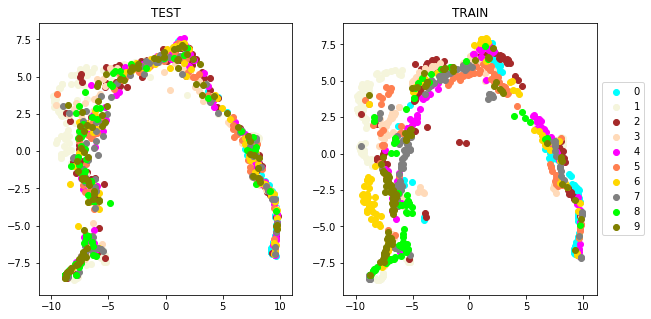

In [17]:
plot_embedding(res_2d_test,y_test,res_2d_train,y_train)

### model 2

In [18]:
import keras.backend.tensorflow_backend as K
count = 0

In [19]:
w_dec = K.variable(1)
w_cla = K.variable(1)

autoencoder,encoder = generate_supervised_autoencoder_callback(w_dec,w_cla,embedding_size=20)
count = count + 1

In [20]:
#path = "test_MINST/esperimento_00000"+str(count)
#tb = TensorBoard(log_dir=path)

epochs = 200
scaler = 50
my = MyCallback_low_high(w_dec,w_cla,epochs,l_period=10)

h = autoencoder.fit(x_train,
                    {'decoder': x_train, 'classifier': y_train},
                    epochs=epochs,  
                    batch_size=256,
                    verbose=0,
                    validation_split=0.2,
                    callbacks=[my])

a = autoencoder.evaluate(x_train,[x_train,y_train])
n = autoencoder.metrics_names
for i in range(0,len(a)):
    print(str(n[i])+" "+str(a[i]))

1000/1000 [==============================] - 0s 46us/step
loss 0.14283093385584653
decoder_loss 0.05324463218450546
classifier_loss 0.14283093385584653
decoder_mean_squared_error 0.05324463218450546
classifier_acc 0.97


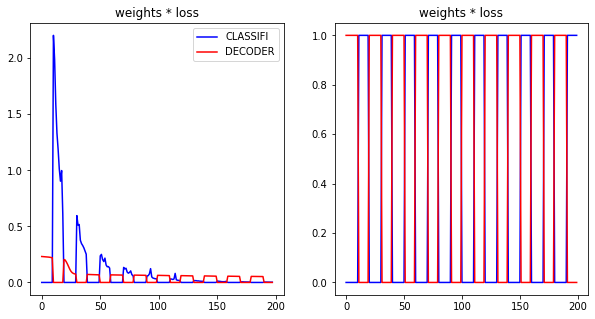

In [21]:
plot_loss(my,h)

DIM: 20             TEST    TRAIN
----------------  ------  -------
K.N.N.  accuracy   0.849    0.963
DIM: 2              TEST    TRAIN
----------------  ------  -------
K.N.N.  accuracy   0.704    0.977


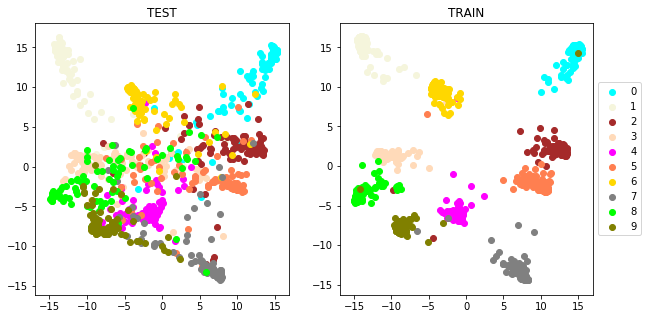

In [22]:
emb_train = encoder.predict(x_train)
emb_test = encoder.predict(x_test)
evaluate(emb_test,y_test,emb_train,y_train)


res_2d_test, res_2d_train = from_emb_to_2D(emb_train,y_train,emb_test)
evaluate(res_2d_test,y_test,res_2d_train,y_train)

plot_embedding(res_2d_test,y_test,res_2d_train,y_train)

### model 3

In [23]:
#path = "test_MINST/esperimento_00000"+str(count)
#tb = TensorBoard(log_dir=path)
w_dec = K.variable(1)
w_cla = K.variable(1)

autoencoder,encoder = generate_supervised_autoencoder_callback(w_dec,w_cla,embedding_size=15)

epochs = 200
plateau = 5
k = 1
n_period = 5

scale_c = 0.2
scale_d = np.linspace(1,3,epochs)

my = MyCallback_sinusoidal(w_dec,w_cla,epochs,plateau,k,n_period,scale_c,scale_d)

h = autoencoder.fit(x_train,
                    {'decoder': x_train, 'classifier': y_train},
                    epochs=epochs,  
                    batch_size=256,
                    verbose=0,
                    validation_split=0.2,
                    callbacks=[my])

a = autoencoder.evaluate(x_train,[x_train,y_train])
n = autoencoder.metrics_names
for i in range(0,len(a)):
    print(str(n[i])+" "+str(a[i]))

1000/1000 [==============================] - 0s 51us/step
loss 0.08891026139259338
decoder_loss 0.0485869734287262
classifier_loss 0.1602980238199234
decoder_mean_squared_error 0.0485869734287262
classifier_acc 0.971


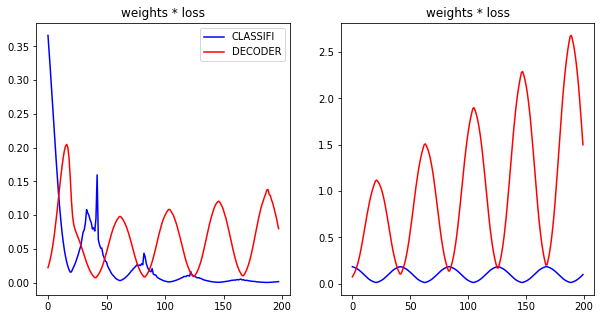

In [24]:
plot_loss(my,h)

DIM: 15             TEST    TRAIN
----------------  ------  -------
K.N.N.  accuracy   0.837    0.936
DIM: 2              TEST    TRAIN
----------------  ------  -------
K.N.N.  accuracy   0.658    0.967


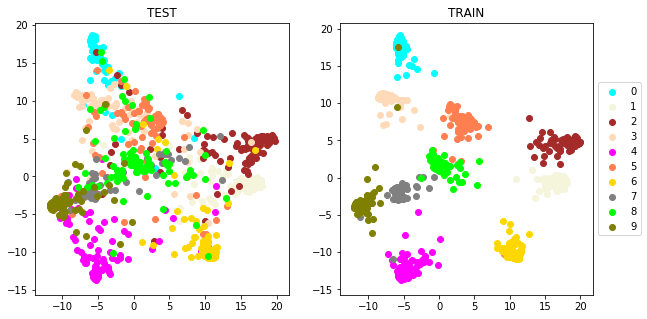

In [25]:
emb_train = encoder.predict(x_train)
emb_test = encoder.predict(x_test)
evaluate(emb_test,y_test,emb_train,y_train)


res_2d_test, res_2d_train = from_emb_to_2D(emb_train,y_train,emb_test)
evaluate(res_2d_test,y_test,res_2d_train,y_train)

plot_embedding(res_2d_test,y_test,res_2d_train,y_train)

# model 4 

In [143]:
from keras.models import Sequential
count = 10

In [194]:
input_img = Input(shape=(784,))
enc = Dense(128, activation='relu')(input_img)
enc = Dense(64, activation='relu')(enc)
enc = Dense(30, activation='relu')(enc)

dec = Dense(64, activation='relu')(enc)
dec = Dense(128, activation='relu')(dec)
dec = Dense(784, activation='sigmoid',name="decoder")(dec)


emb = Dense(15,activation='linear')(enc)
emb = Dense(2,activation='relu')(emb)

cla = Dense(20,activation='relu')(emb)
cla = Dense(20,activation='relu')(emb)
cla = Dense(10,name="classifier",activation='softmax')(cla)


autoencoder = Model(inputs=input_img,outputs=[dec,cla])
encoder = Model(input_img,enc)
embedd = Model(input_img,emb)

autoencoder.compile(optimizer='adadelta', metrics={'decoder': 'mse', 'classifier': ['acc']},
                    loss = {'decoder': 'mean_squared_error', 'classifier': 'categorical_crossentropy'},
                    loss_weights = {'decoder': w_dec, 'classifier': w_cla})

In [195]:
path = "test_MINST/unique_model_"+str(count)
tb = TensorBoard(log_dir=path)
count = count + 1

epochs = 1000
plateau = 5
k = 1
n_period = 5

scale_c = 0.2
scale_d = np.linspace(1,3,epochs)

my = MyCallback_sinusoidal(w_dec,w_cla,epochs,plateau,k,n_period,scale_c,scale_d)

h = autoencoder.fit(x_train,
                    {'decoder': x_train, 'classifier': y_train},
                    epochs=epochs,  
                    batch_size=256,
                    verbose=0,
                    validation_split=0.2,
                    callbacks=[tb,my])

a = autoencoder.evaluate(x_train,[x_train,y_train])
n = autoencoder.metrics_names
for i in range(0,len(a)):
    print(str(n[i])+" "+str(a[i]))

1000/1000 [==============================] - 0s 109us/step
loss 0.10846873611211777
decoder_loss 0.033500720113515854
classifier_loss 0.5477344855070114
decoder_mean_squared_error 0.033500720113515854
classifier_acc 0.935


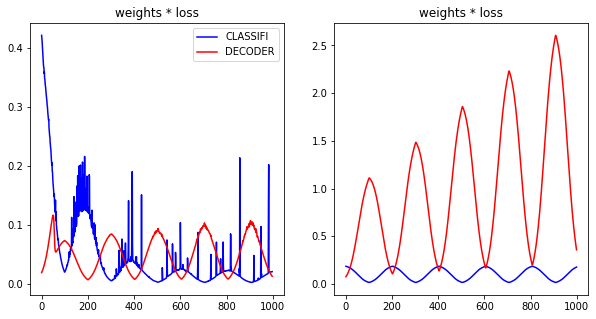

In [196]:
plot_loss(my,h)

[[ -0.         -0.       ]
 [ 59.968067  116.65789  ]
 [ 46.19146    -0.       ]
 [ -0.        153.03287  ]
 [ 56.66253    49.524467 ]
 [ 41.296364   -0.       ]
 [ 75.09754    76.91873  ]
 [  0.2850248  -0.       ]
 [ 92.62916   152.32275  ]
 [ 27.282515   -0.       ]]
DIM: 2              TEST    TRAIN
----------------  ------  -------
K.N.N.  accuracy   0.603    0.923


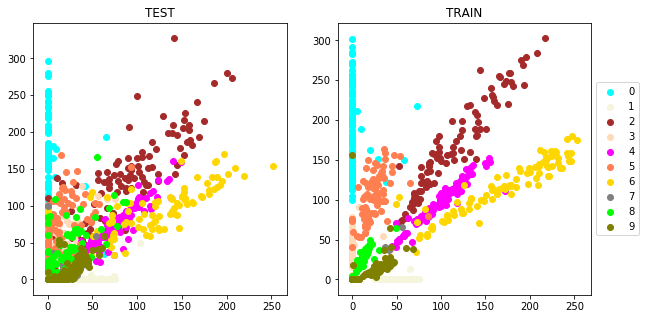

In [197]:
print(embedd.predict(x_test[0:10]))
emb_train = embedd.predict(x_train)
emb_test = embedd.predict(x_test)
evaluate(emb_test,y_test,emb_train,y_train)

plot_embedding(emb_test,y_test,emb_train,y_train)

In [4]:
def load_MINST(train,test):
    
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    y_train = utilities.from_np_to_one_hot(y_train)
    y_test = utilities.from_np_to_one_hot(y_test)

    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.
    x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
    x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
    x_train = x_train[0:train]
    y_train = y_train[0:train]

    x_test = x_test[0:test]
    y_test = y_test[0:test]
    
    return(x_train,y_train,x_test,y_test)

In [2]:
import keras.backend.tensorflow_backend as K
from keras import callbacks
import math

class MyCallback_sinusoidal(callbacks.Callback):
    def __init__(self, w_dec, w_cla, n_epoch,plateau,k,n_period,scale_c,scale_d):
        
        self.n_epoch = n_epoch
        self.w_dec = w_dec
        self.w_cla = w_cla
        
        self.w_clas = []
        self.w_decs = []
        
        if (isinstance(scale_c,(int,float))):
            scale_c = np.ones(n_epoch)*scale_c
        
        if (isinstance(scale_d,(int,float))):
            scale_d = np.ones(n_epoch)*scale_d
            
        self.scale_c = scale_c
        self.scale_d = scale_d
        
        self.sigmoid = gen_sigm_seq(plateau,k,n_epoch,n_period)
        
        
    def on_epoch_end(self, epoch, logs={}):
        K.set_value(self.w_cla, (-self.sigmoid[epoch]+1)*self.scale_c[epoch])
        K.set_value(self.w_dec, (self.sigmoid[epoch])*self.scale_d[epoch])

            
        self.w_decs.append(K.get_value(self.w_dec))
        self.w_clas.append(K.get_value(self.w_cla))
            

            

In [3]:
def gen_sigm_seq(plateau,k,epoche,period):
    
    points = int(epoche/(2*period))+1
    res = []
    for i in range(period):
        pos = gen_bell(plateau,k,points,True)
        res = res + pos

    return(res)
        
def gen_bell(plateau,k,points,sign):
    
    fir = gen_sigm(plateau,k,points,sign)
    sec = gen_sigm(plateau,k,points,not sign)

    return (fir+sec)
    
    

def gen_sigm(plateau,k,points,sign):
    samples = np.linspace(-plateau/2,plateau/2,points)

    res = []
    for i in samples:
        y = 1/(1+math.pow(math.e,-k*i))
        if (sign==False):
            res.append(-y +1 )    
        else:
            res.append(y)
    return(list(res))

In [4]:
from keras import callbacks
import math

class MyCallback_low_high(callbacks.Callback):
    def __init__(self, w_dec, w_cla, n_epoch,l_period):
        
        self.n_epoch = n_epoch
        self.w_dec = w_dec
        self.w_cla = w_cla
        
        self.w_clas = []
        self.w_decs = []
        
        self.l_period = l_period * 2
        self.current = 0
        
    def on_epoch_end(self, epoch, logs={}):
        
        if (self.current <= (self.l_period/2)):
            self.current = self.current + 1
            K.set_value(self.w_cla, 0)
            K.set_value(self.w_dec, 1)
        else:
            self.current = self.current + 1
            K.set_value(self.w_cla, 1)
            K.set_value(self.w_dec, 0)
            
        if (self.current == self.l_period):
            self.current = 0

            
        self.w_decs.append(K.get_value(self.w_dec))
        self.w_clas.append(K.get_value(self.w_cla))

In [5]:
from keras import backend as K

def generate_supervised_autoencoder_callback(w_dec,w_cla,embedding_size=32):

    input_img = Input(shape=(784,))
    enc = Dense(128, activation='relu')(input_img)
    enc = Dense(64, activation='relu')(enc)
    enc = Dense(embedding_size, activation='relu')(enc)

    dec = Dense(64, activation='relu')(enc)
    dec = Dense(128, activation='relu')(dec)
    dec = Dense(784, activation='sigmoid',name="decoder")(dec)


    cla = Dense(10,name="classifier",activation='softmax')(enc)

    autoencoder = Model(inputs=input_img,outputs=[dec,cla])
    encoder = Model(input_img,enc)

    autoencoder.compile(optimizer='adadelta', metrics={'decoder': 'mse', 'classifier': ['acc']},
                        loss = {'decoder': 'mean_squared_error', 'classifier': 'categorical_crossentropy'},
                        loss_weights = {'decoder': w_dec, 'classifier': w_cla})
    return(autoencoder,encoder)

In [6]:


def plot_loss(my,h):
    clas = my.w_clas
    clal = h.history['classifier_loss']

    dec = my.w_decs
    decl = h.history['decoder_loss']

    c = []
    d = []

    for i in range(len(dec)):
        c.append(clas[i]*clal[i])
        d.append(dec[i]*decl[i])

    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.title("weights * loss")
    plt.plot(c[1:-1],label="CLASSIFI",c = 'b')
    plt.plot(d[1:-1],label="DECODER", c="r")
    plt.legend()

    plt.subplot(122)
    plt.title("weights * loss")
    plt.plot(my.w_clas,label="CLASSIFI",c = 'b')
    plt.plot(my.w_decs,label="DECODER", c="r")
    
    plt.show()


In [7]:
from tabulate import tabulate
def evaluate(emb_test,y_test,emb_train,y_train):
    dim = len(emb_test[0])
    eva = Evaluator(KNeighborsClassifier(n_neighbors = 1))
    acc_test, _,_,_ = eva.performance_with_kfold(emb_test,y_test)
    acc_test = "%.3f" % np.mean(acc_test)
    
    eva = Evaluator(KNeighborsClassifier(n_neighbors = 1))
    acc_train, _,_,_ = eva.performance_with_kfold(emb_train,y_train)
    acc_train = "%.3f" % np.mean(acc_train)
    
    print (tabulate([['K.N.N.  accuracy', acc_test, acc_train]], headers=["DIM: "+str(dim), 'TEST','TRAIN']))

In [8]:
def from_emb_to_2D(emb_train,y_train,emb_test):
    uma = umap.UMAP(n_components=2, random_state=10)
    rf_umap = Transformer_RF_umap(uma)

    rf_umap.fit(emb_train,utilities.from_one_hot_to_np(y_train))
    res_test = rf_umap.transform(emb_test)
    res_train = rf_umap.transform(emb_train)
    
    return(res_test,res_train)

    


In [9]:

def generate_deep_autoencoder():
    input_img = Input(shape=(784,))
    enc = Dense(128, activation='relu')(input_img)
    enc = Dense(64, activation='relu')(enc)
    enc = Dense(32, activation='relu')(enc)

    dec = Dense(64, activation='relu')(enc)
    dec = Dense(128, activation='relu')(dec)
    dec = Dense(784, activation='sigmoid')(dec)

    autoencoder = Model(input_img,dec)
    encoder = Model(input_img,enc)

    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
    return (autoencoder, encoder)



In [10]:
class Transformer_RF_umap:

    def __init__(self, estimator, has_fit=True):
        self.has_fit = has_fit
        self.estimator = estimator
        self.regr_rf = RandomForestRegressor(n_estimators=500, max_depth=30, random_state=2)

    def fit(self,X,y,node_feature=None):
        
        if (self.has_fit == True): 
            res_uma_train = self.estimator.fit(X,y).transform(X)
            regr_rf = self.regr_rf.fit(X,res_uma_train)
            
        return(self)
    
    
    def transform(self,X):
        y_pred = self.regr_rf.predict(X)
        return(y_pred)